# Word Clouds For Helpful And Unhelpful

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pymongo import MongoClient as Client

## Setup DB Connection

In [24]:
conn = Client("localhost")
db = conn.de_ds
train_collection = db.train

## Retreive Helpful Reviews Text And Append It In A String

In [25]:
helpful_text = ""
for text in train_collection.find({"label": "helpful"}, {"_id": 0, "text": 1}):
    helpful_text += text["text"]

## Split Text Into Array And Clean It From
<ol>
    <li>Empty Strings</li>
    <li>Non Alpha Strings</li>
    <li>Stop Words</li>
</ol>


In [26]:
helpful_text = helpful_text.split()
num_of_words_in_helpful_org = len(helpful_text)
helpful_text = [word for word in helpful_text if word]
num_of_words_in_helpful_no_empty = len(helpful_text)
helpful_text = [word for word in helpful_text if word.isalpha()]
num_of_words_in_helpful_no_empty_spc = len(helpful_text)
helpful_text = [word for word in helpful_text if word not in STOPWORDS]
num_of_words_in_helpful_no_empty_spc_stop_words = len(helpful_text)

## Print The lenght of each Cleaning Setup

In [30]:
print(f"Number Of Original Words is {num_of_words_in_helpful_org}")
print(f"Number Of Words After Removing Empty {num_of_words_in_helpful_no_empty}")
print(f"Number Of Words After Removing Empty And Non Alpha {num_of_words_in_helpful_no_empty_spc}")
print(f"Number Of Words After Removing Empty And Non Alpha And Stop Words {num_of_words_in_helpful_no_empty_spc_stop_words}")

Number Of Original Words is 979554
Number Of Words After Removing Empty 979554
Number Of Words After Removing Empty And Non Alpha 833032
Number Of Words After Removing Empty And Non Alpha And Stop Words 424380


# Generate The WordCloud Image

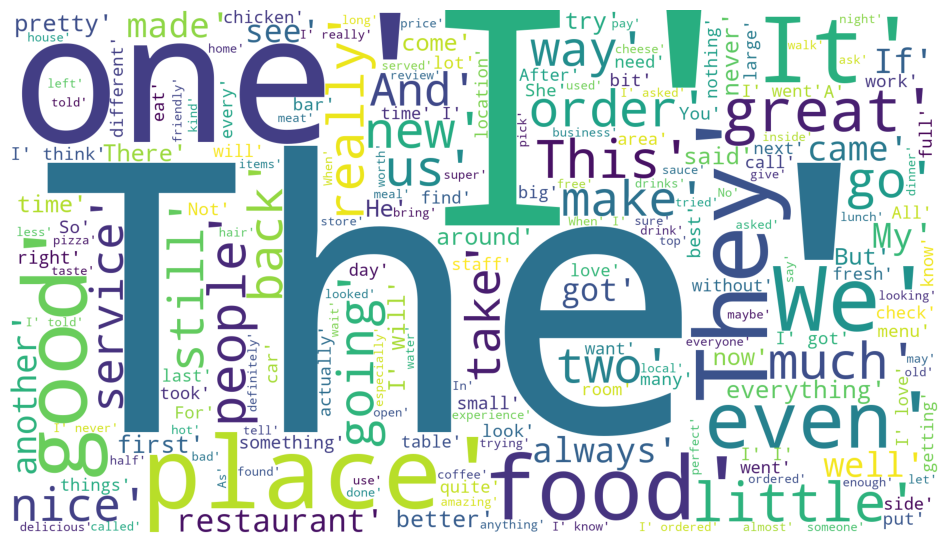

In [33]:
wc_helpful = WordCloud(background_color="white", width=1920, height=1080)
wc_helpful.generate_from_text(str(helpful_text))
wc_helpful.colormap = "twilight_shifted"
wc_helpful.font_family = "Noto Sans CJK JP"
wc_helpful.max_words = 200
wc_helpful.relative_scaling = 0.5
wc_helpful.prefer_horizontal = 0.6
plt.figure(figsize=(12, 8))
plt.imshow(wc_helpful)
plt.axis("off")
plt.show()
wc_helpful.to_file("wordcloudHelpful.png")

## Retreive Unhelpful Reviews Text And Append It In A String

In [34]:
unhelpful_text = ""
for text in train_collection.find({"label": "unhelpful"}, {"_id": 0, "text": 1}):
    unhelpful_text += text["text"]

## Split Text Into Array And Clean It From
<ol>
    <li>Empty Strings</li>
    <li>Non Alpha Strings</li>
    <li>Stop Words</li>
</ol>

In [35]:
unhelpful_text = unhelpful_text.split()
num_of_words_in_unhelpful_org = len(unhelpful_text)
unhelpful_text = [word for word in unhelpful_text if word]
num_of_words_in_unhelpful_no_empty = len(unhelpful_text)
unhelpful_text = [word for word in unhelpful_text if word.isalpha()]
num_of_words_in_unhelpful_no_empty_spc = len(unhelpful_text)
unhelpful_text = [word for word in unhelpful_text if word not in STOPWORDS]
num_of_words_in_unhelpful_no_empty_spc_stop_words = len(unhelpful_text)

## Print The lenght of each Cleaning Setup

In [36]:
print(f"Number Of Original Words is {num_of_words_in_unhelpful_org}")
print(f"Number Of Words After Removing Empty {num_of_words_in_unhelpful_no_empty}")
print(f"Number Of Words After Removing Empty And Non Alpha {num_of_words_in_unhelpful_no_empty_spc}")
print(f"Number Of Words After Removing Empty And Non Alpha And Stop Words {num_of_words_in_unhelpful_no_empty_spc_stop_words}")

Number Of Original Words is 400918
Number Of Words After Removing Empty 400918
Number Of Words After Removing Empty And Non Alpha 341020
Number Of Words After Removing Empty And Non Alpha And Stop Words 176249


## Generate The WordCloud Image

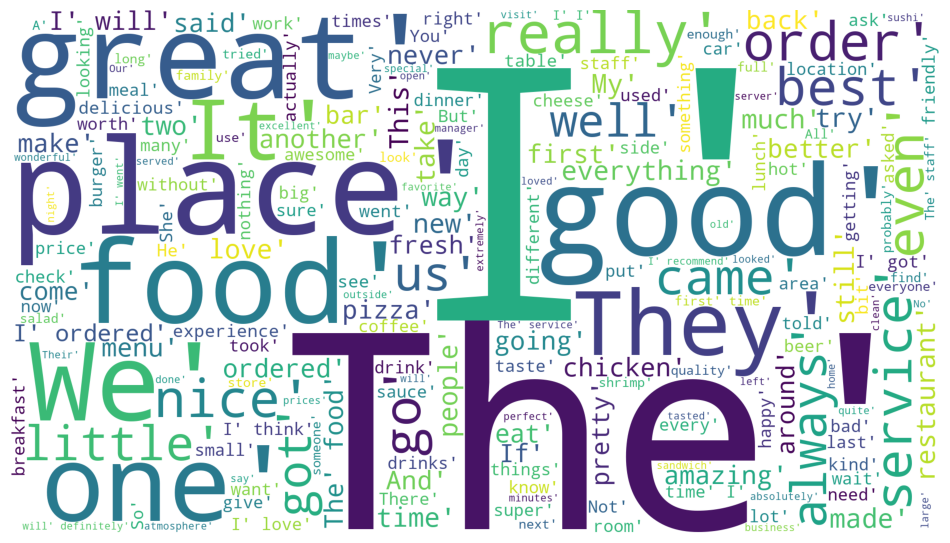

In [37]:
wc_unhelpful = WordCloud(background_color="white", width=1920, height=1080)
wc_unhelpful.generate_from_text(str(unhelpful_text))
wc_unhelpful.colormap = "twilight_shifted"
wc_unhelpful.font_family = "Noto Sans CJK JP"
wc_unhelpful.max_words = 200
wc_unhelpful.relative_scaling = 0.5
wc_unhelpful.prefer_horizontal = 0.6
plt.figure(figsize=(12, 8))
plt.imshow(wc_unhelpful)
plt.axis("off")
plt.show()
wc_unhelpful.to_file("wordcloudUnhelpful.png")